In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from ReliefF import ReliefF
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

from util import *

In [2]:
diabetes_df = read_diabetes_data()
diabetes_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
features_df = data_cleaning(diabetes_df)
features_df = label_encoding(features_df)
y = create_target(diabetes_df)

In [4]:
top_features = ['troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone',
       'examide', 'citoglipton', 'miglitol', 'acetohexamide',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'tolazamide',
       'tolbutamide', 'chlorpropamide', 'acarbose', 'nateglinide', 'weight',
       'glyburide-metformin', 'repaglinide', 'max_glu_serum',
       'number_inpatient', 'number_emergency', 'glimepiride', 'rosiglitazone',
       'pioglitazone', 'number_outpatient', 'glipizide', 'glyburide',
       'A1Cresult', 'medical_specialty', 'discharge_disposition_id',
       'metformin', 'race', 'diabetesMed', 'gender', 'diag_3',
       'admission_type_id', 'change', 'diag_2', 'diag_1', 'num_procedures',
       'insulin', 'number_diagnoses', 'age', 'time_in_hospital',
       'num_lab_procedures', 'num_medications']

In [5]:
X = features_df[top_features[0:36]].values
X = X.reshape(101766, 6, 6)
np.shape(X)

(101766, 6, 6)

In [6]:
history = model_training_cnn(X, y)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 4, 4, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 4,802
Trainable params: 4,802
Non-trainable params: 0
______________________________________________________

2022-04-05 14:22:02.403782: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


775/780 [============================>.] - ETA: 0s - loss: 0.6684 - accuracy: 0.6026
Epoch 1: val_loss improved from inf to 0.65770, saving model to models/model.hdf5
780/780 [==============================] - 2s 2ms/step - loss: 0.6684 - accuracy: 0.6025 - val_loss: 0.6577 - val_accuracy: 0.6147
Epoch 2/50
752/780 [===========================>..] - ETA: 0s - loss: 0.6588 - accuracy: 0.6155
Epoch 2: val_loss did not improve from 0.65770
780/780 [==============================] - 1s 1ms/step - loss: 0.6587 - accuracy: 0.6154 - val_loss: 0.6578 - val_accuracy: 0.6151
Epoch 3/50
765/780 [============================>.] - ETA: 0s - loss: 0.6558 - accuracy: 0.6182
Epoch 3: val_loss did not improve from 0.65770
780/780 [==============================] - 1s 1ms/step - loss: 0.6560 - accuracy: 0.6180 - val_loss: 0.6586 - val_accuracy: 0.6181
Epoch 4/50
750/780 [===========================>..] - ETA: 0s - loss: 0.6549 - accuracy: 0.6215
Epoch 4: val_loss improved from 0.65770 to 0.65556, saving

780/780 [==============================] - 1s 2ms/step - loss: 0.6436 - accuracy: 0.6268 - val_loss: 0.6453 - val_accuracy: 0.6258
Epoch 30/50
748/780 [===========================>..] - ETA: 0s - loss: 0.6435 - accuracy: 0.6250
Epoch 30: val_loss did not improve from 0.64532
780/780 [==============================] - 1s 1ms/step - loss: 0.6435 - accuracy: 0.6250 - val_loss: 0.6484 - val_accuracy: 0.6226
Epoch 31/50
749/780 [===========================>..] - ETA: 0s - loss: 0.6433 - accuracy: 0.6259
Epoch 31: val_loss did not improve from 0.64532
780/780 [==============================] - 1s 1ms/step - loss: 0.6436 - accuracy: 0.6259 - val_loss: 0.6471 - val_accuracy: 0.6229
Epoch 32/50
766/780 [============================>.] - ETA: 0s - loss: 0.6429 - accuracy: 0.6280
Epoch 32: val_loss did not improve from 0.64532
780/780 [==============================] - 1s 1ms/step - loss: 0.6430 - accuracy: 0.6280 - val_loss: 0.6462 - val_accuracy: 0.6255
Epoch 33/50
773/780 [====================

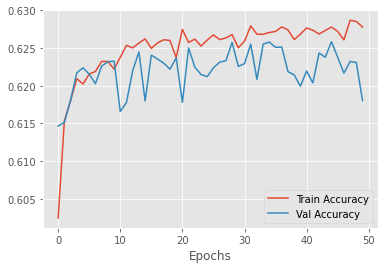

In [7]:
plot_history(history)